## Exercício de Análise de Dados

### Puxar base de dados nova

In [ ]:
import pandas as pd

tabela = pd.read_csv('exportacoes_franca.csv')

display(tabela.head(5))

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600


### Informações Gerais

Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

In [23]:
num_linhas = tabela.shape[0]
print(f'A tabela tem {num_linhas} linhas')

valores_vazios = tabela.isna().sum().sum()
print(f'A tabela tem {valores_vazios} valores vazios')

print('')

tabela.info()

A tabela tem 142360 linhas
A tabela tem 0 valores vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


### Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

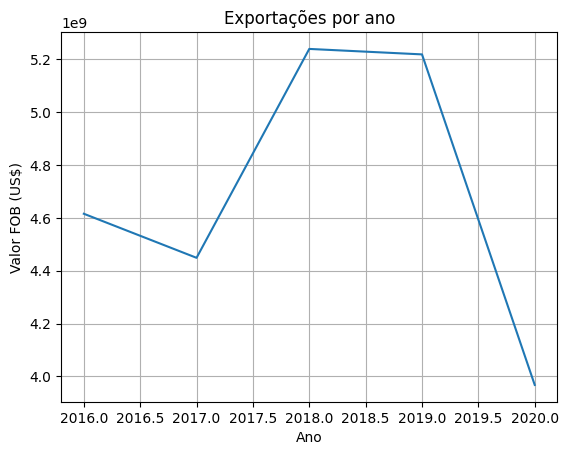

,Year,US$ FOB
0,2016,"US$4,615,500,082"
1,2017,"US$4,448,705,456"
2,2018,"US$5,239,424,416"
3,2019,"US$5,218,723,612"
4,2020,"US$3,967,594,810"


In [ ]:
import matplotlib.pyplot as plt

exportacoes_por_ano_df = tabela.groupby('Year')['US$ FOB'].sum().reset_index()

def formatar(valor):
    valor_formatado = f"US${valor:,}"
    return valor_formatado

plt.plot(exportacoes_por_ano_df['Year'],
         exportacoes_por_ano_df['US$ FOB'])
plt.xlabel('Ano')
plt.ylabel('Valor FOB (US$)')
plt.title('Exportações por ano')
plt.grid(True)
plt.show()

exportacoes_por_ano_df["US$ FOB"] = exportacoes_por_ano_df["US$ FOB"].apply(formatar)
display(exportacoes_por_ano_df)


### Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

In [58]:
exportacoes_por_produto_df = tabela.groupby('SH4 Code')['US$ FOB'].sum().reset_index().sort_values(by='US$ FOB', ascending=False)

exportacoes_por_produto_df["US$ FOB"] = exportacoes_por_produto_df["US$ FOB"].apply(formatar)

display(exportacoes_por_produto_df.head(10))

,SH4 Code,US$ FOB
154,2304,"US$5,628,424,640"
176,2601,"US$3,264,280,488"
391,4703,"US$1,845,424,684"
61,901,"US$1,072,554,752"
843,8802,"US$685,133,070"
83,1201,"US$600,890,152"
844,8803,"US$567,097,230"
186,2709,"US$492,201,844"
187,2710,"US$491,959,478"
717,8411,"US$474,382,434"


### Em 2020 qual cidade mais exportou para a França?
Em valores US$

In [93]:
exportacoes_2020 = tabela.loc[tabela['Year']==2020, :]
display(exportacoes_2020.head(3))

exportacoes_por_cidade = exportacoes_2020.groupby('City')['US$ FOB'].sum().reset_index().sort_values(by='US$ FOB' ,ascending=False)
exportacoes_por_cidade['US$ FOB'] = exportacoes_por_cidade['US$ FOB'].apply(formatar)

print(f'A cidade que mais exportou para a França em 2020 foi {list(exportacoes_por_cidade['City'])[0]}, com total de {list(exportacoes_por_cidade['US$ FOB'])[0]}')
print('')

for i , cidade in enumerate(exportacoes_por_cidade['City']):
    if i < 5:
        print(f'{i + 1}ª: {cidade}')
    else:
        pass

display(exportacoes_por_cidade.head(10))

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
8482,2020,1,France,Abaetetuba - PA,2008,"Fruit, nuts and other edible parts of plants, ...",20,"Preparations of vegetables, fruit, nuts or oth...",Europe,42609,16560
8483,2020,1,France,Abaetetuba - PA,2008,"Fruit, nuts and other edible parts of plants, ...",20,"Preparations of vegetables, fruit, nuts or oth...",European Union (EU),42609,16560
8484,2020,1,France,Aguaí - SP,804,"Dates, figs, pineapples, avocados, guavas, man...",8,Edible fruit and nuts; peel of citrus fruits o...,Europe,2861,1728


A cidade que mais exportou para a França em 2020 foi Duque de Caxias - RJ, com total de US$279,405,596

1ª: Duque de Caxias - RJ
2ª: Luís Eduardo Magalhães - BA
3ª: Ponta Grossa - PR
4ª: São José dos Campos - SP
5ª: Rio de Janeiro - RJ


,City,US$ FOB
180,Duque de Caxias - RJ,"US$279,405,596"
326,Luís Eduardo Magalhães - BA,"US$265,328,132"
456,Ponta Grossa - PR,"US$187,777,016"
576,São José dos Campos - SP,"US$172,939,276"
508,Rio de Janeiro - RJ,"US$122,522,214"
418,Parauapebas - PA,"US$116,345,790"
237,Imperatriz - MA,"US$99,018,096"
502,Rio Grande - RS,"US$95,069,956"
278,Jacareí - SP,"US$84,557,000"
106,Canaã dos Carajás - PA,"US$80,584,230"


### Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?

In [ ]:
caxias_df = exportacoes_2020.loc[exportacoes_2020['City']=='Duque de Caxias - RJ', :]
magalhaes_df = exportacoes_2020.loc[exportacoes_2020['City']=='Luís Eduardo Magalhães - BA', :]

produtos_mais_exportados_caxias_df = caxias_df.groupby('SH4 Code')['US$ FOB'].sum().reset_index().sort_values(by='US$ FOB', ascending=False)
produtos_mais_exportados_magalhes_df = magalhaes_df.groupby('SH4 Code')['US$ FOB'].sum().reset_index().sort_values(by='US$ FOB', ascending=False)

produtos_mais_exportados_caxias_df['US$ FOB'] = produtos_mais_exportados_caxias_df['US$ FOB'].apply(formatar)
produtos_mais_exportados_magalhes_df['US$ FOB'] = produtos_mais_exportados_magalhes_df['US$ FOB'].apply(formatar)

display(produtos_mais_exportados_caxias_df.head(10))
display(produtos_mais_exportados_magalhes_df)

,SH4 Code,US$ FOB
31,8411,"US$164,981,032"
1,2709,"US$67,221,022"
37,8483,"US$9,795,392"
36,8482,"US$8,247,090"
19,7318,"US$4,218,846"
0,2304,"US$4,014,274"
25,7508,"US$2,951,246"
21,7326,"US$2,847,128"
35,8481,"US$2,056,522"
29,7806,"US$1,660,180"


,SH4 Code,US$ FOB
1,2304,"US$265,299,808"
0,807,"US$28,324"
